In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from plot_decision_regions import plot_decision_regions

In [3]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [4]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
X_combined = np.vstack((X_train, X_test))

In [6]:
y_combined = np.hstack((y_train, y_test))

In [7]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

In [8]:
plt.xlabel('petal length [cm]')

Text(0.5,0,'petal length [cm]')

In [9]:
plt.ylabel('petal width [cm]')

Text(0,0.5,'petal width [cm]')

In [10]:
plt.legend(loc='upper left')

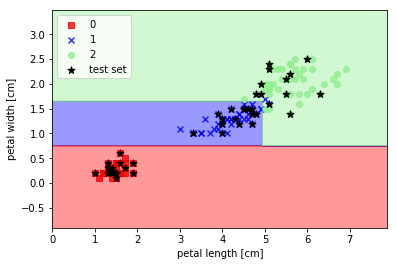

In [11]:
plt.show()

In [12]:
from sklearn.tree import export_graphviz

In [13]:
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

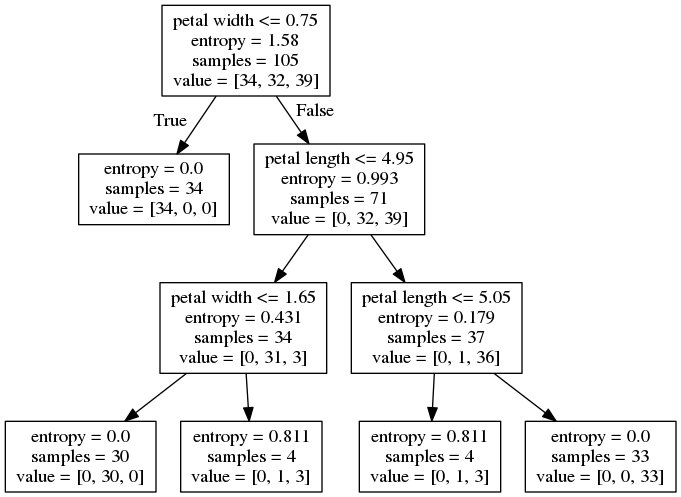

In [26]:
import graphviz
import pydotplus
from IPython.display import Image
with open("tree.dot") as f:
    dot_graph = f.read()
 
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(graph.create_png())